In [1]:
from numba import cuda
print(cuda.detect())

Found 1 CUDA devices
id 0    b'NVIDIA GeForce RTX 3050 Ti Laptop GPU'                              [SUPPORTED]
                      Compute Capability: 8.6
                           PCI Device ID: 0
                              PCI Bus ID: 1
                                    UUID: GPU-337a4bba-2079-86f7-6461-210706c29f43
                                Watchdog: Enabled
             FP32/FP64 Performance Ratio: 32
Summary:
	1/1 devices are supported
True


In [1]:
# something to help gpu work
import os
os.environ['NUMBA_CUDA_ENABLE_MINOR_VERSION_COMPATIBILITY'] = '1'

from numba import config
config.CUDA_ENABLE_MINOR_VERSION_COMPATIBILITY = True

In [2]:
import warnings
warnings.filterwarnings("ignore")
import sys
# to avoid any possible jupyter crashes due to rpy2 not finding the R install on conda
os.environ['R_HOME'] = sys.exec_prefix+"/lib/R/"
from anndata import AnnData
import numpy as np
import pandas as pd
import scanpy as sc
import scFates as scf
import palantir
import matplotlib.pyplot as plt
sc.settings.verbosity = 3
sc.settings.logfile = sys.stdout

## fix palantir breaking down some plots
import seaborn
seaborn.reset_orig()
%matplotlib inline
sc.set_figure_params()
scf.set_figure_pubready()

In [3]:
print(os.getenv('NUMBA_CUDA_ENABLE_MINOR_VERSION_COMPATIBILITY'))

1


In [4]:
adata_crinier = sc.read_h5ad('/home/biocodingbarbie/OneDrive/PhD/Public datasets/NK studies datasets/adata_crinier_post_scvi.h5ad')

In [5]:
adata = adata_crinier[adata_crinier.obs['Cell labels'] != 'Unknown']

In [6]:
# tree inference using simple ppt

In [7]:
scf.tl.tree(adata,method="ppt",Nodes=200,use_rep="scVI",
            device="gpu",seed=1,ppt_lambda=100,ppt_sigma=0.025,ppt_nsteps=200)

inferring a principal tree --> parameters used 
    200 principal points, sigma = 0.025, lambda = 100, metric = euclidean
    fitting:   0%|                     | 0/200 [00:00<?, ?it/s]Label prop iterations: 8
Label prop iterations: 3
Iterations: 2
50403,1653,1645,15,1185,4229
    fitting:   0%|             | 1/200 [00:03<11:26,  3.45s/it]Label prop iterations: 5
Label prop iterations: 5
Label prop iterations: 3
Label prop iterations: 2
Iterations: 4
8757,2477,2486,18,2871,7149
    fitting:   1%|▏            | 2/200 [00:03<05:03,  1.53s/it]Label prop iterations: 7
Label prop iterations: 5
Label prop iterations: 4
Label prop iterations: 2
Iterations: 4
11071,2374,2393,18,2957,7726
    fitting:   2%|▏            | 3/200 [00:03<03:02,  1.08it/s]Label prop iterations: 7
Label prop iterations: 4
Label prop iterations: 4
Label prop iterations: 3
Iterations: 4
9715,2440,2465,16,2968,7654
    fitting:   2%|▎            | 4/200 [00:04<02:04,  1.57it/s]Label prop iterations: 5
Label prop iterati

In [8]:
# scf.tl.tree(adata_crinier,method="epg",Nodes=200,use_rep="scVI",
#             device="cpu",seed=1,ppt_lambda=100,ppt_sigma=0.025,ppt_nsteps=200)

In [9]:
adata

AnnData object with n_obs × n_vars = 24018 × 12049
    obs: 'Sample', 'Study', 'Sequencing_depth', 'Organ', 'Cell labels', '_scvi_batch', '_scvi_labels', 'leiden'
    uns: 'Cell labels_colors', 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'neighbors', 'umap', 'graph', 'ppt'
    obsm: 'X_scVI', 'X_umap', 'X_R'
    layers: 'scVI normalised'
    obsp: 'connectivities', 'distances'

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

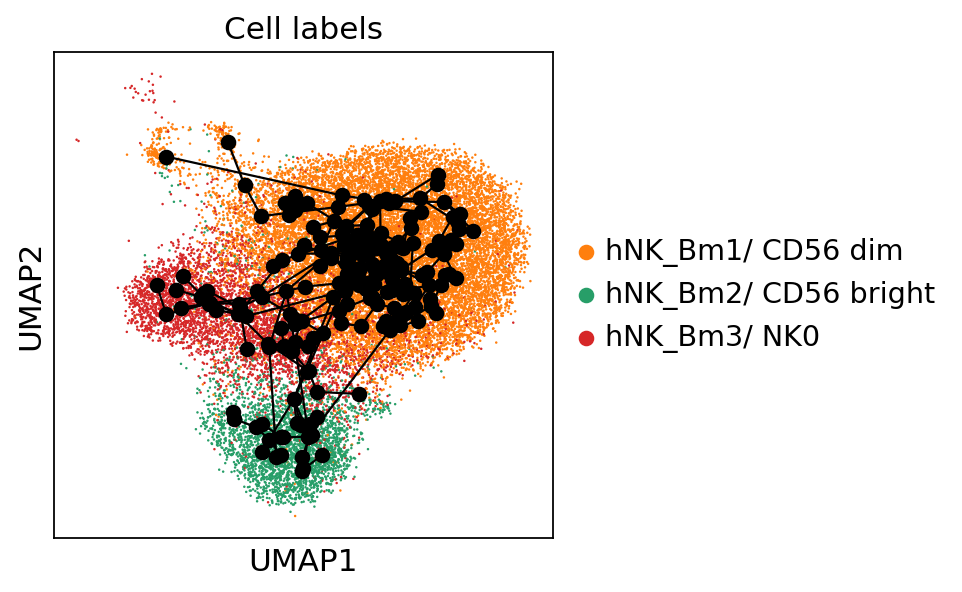

In [10]:
scf.pl.graph(adata, basis = 'umap', linewidth  = 1, color_cells = 'Cell labels', tips = False, forks = False, )

In [11]:
scf.tl.cleanup(adata, minbranchlength=4, leaves=None, copy=False)

    graph cleaned --> removed 133 principal points


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

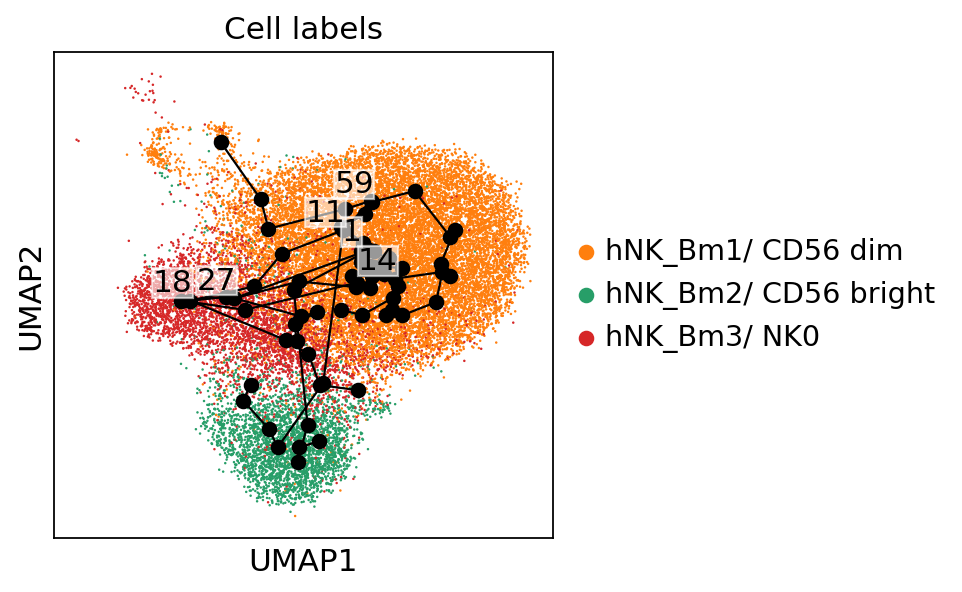

In [12]:
scf.pl.graph(adata, basis = 'umap', linewidth  = 1, color_cells = 'Cell labels', tips = False,  )

In [13]:
adata.write('adta_crinier_post_tree_inference.h5ad', compression = 'lzf')